# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face detection
Task is to predict the boundaries(mask) around the face in a given image.

## Dataset
Faces in images marked with bounding boxes. Have around 500 images with around 1100 faces manually tagged via bounding box.

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [453]:
#from google.colab import drive
#drive.mount('/content/drive')

### Change current working directory to project folder (1 mark)

In [454]:
import os
#### Add your code here ####

# THIS PROJECT IS DONE ON LOCAL MACHINE

# Else the code would be  : 
#from google.colab import drive
#drive.mount('/content/drive/')
#project_path = "drive/My Drive/Colab Notebooks/Unet/"
#Change current working directory to project folder
#os.chdir(project_path)

In [455]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

In [456]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224 

### Load the "images.npy" file (4 marks)
- This file contains images with details of bounding boxes

In [457]:
data = np.load("images.npy")

In [458]:
data.shape

(409, 2)

### Check one sample from the loaded "images.npy" file  (4 marks)

image shape h, w, c :  (333, 650, 3)


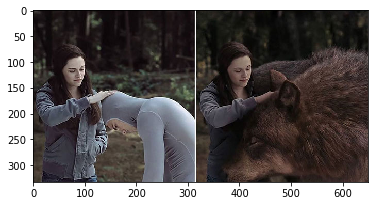

In [459]:
#### Add your code here ####

# Sample - 1

img1 = data[0][0]
img1 = img1[:, :, :3]

print("image shape h, w, c : ", data[0][0].shape )
plt.imshow(img1)
plt.show()

In [460]:
# information about the mask for above image
data[0][1]

[{'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.08615384615384615, 'y': 0.3063063063063063},
   {'x': 0.1723076923076923, 'y': 0.45345345345345345}],
  'imageWidth': 650,
  'imageHeight': 333},
 {'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.583076923076923, 'y': 0.2912912912912913},
   {'x': 0.6584615384615384, 'y': 0.46846846846846846}],
  'imageWidth': 650,
  'imageHeight': 333}]

### Checking a sample image with a single face and its ground truth mask 

In [461]:
data[10][0].shape # image size h, w, c

(337, 600, 3)

In [462]:
data[10][1]

[{'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.48, 'y': 0.10385756676557864},
   {'x': 0.7716666666666666, 'y': 0.6795252225519288}],
  'imageWidth': 600,
  'imageHeight': 337}]

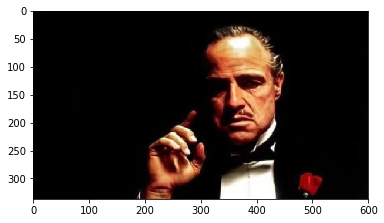

In [463]:
plt.imshow(data[10][0]) # Original image before resizing

In [464]:
img10 = data[10][0]

In [465]:
img10 = cv2.resize(img10, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
try:
    img10 = img10[:, :, :3]
except:
    print("catch")

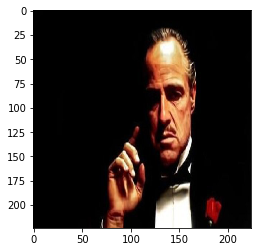

In [466]:
plt.imshow(img10) # Showing image after resizing to 224 x 224

In [467]:
X_t = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
X_t[10] = preprocess_input(np.array(img10, dtype=np.float32))

In [468]:
masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))

In [469]:
masks.shape

(409, 224, 224)

In [470]:
for i in data[10][1]:
    x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
    x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
    y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
    y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
    masks[10][y1:y2, x1:x2] = 1

In [471]:
masks[10].shape

(224, 224)

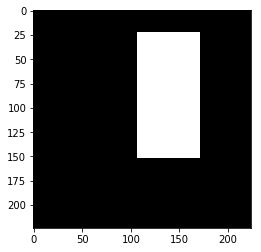

In [472]:
plt.imshow(masks[10], cmap='gray')

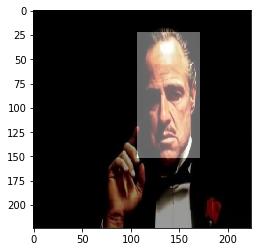

In [473]:
# Checking if the calculated masks are located properly after superimposing
plt.imshow(img10)
plt.imshow(masks[10], alpha=0.4, cmap='gray')

### Set image dimensions   (2 marks)
- Initialize image height, image width with value: 224 

In [474]:
# ALREADY DONE IN THE CODE ABOVE  # 

#IMAGE_WIDTH = 224 #### Add your code here ####
#IMAGE_HEIGHT = 224 #### Add your code here ####

### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X_train" array
- Masks will be stored in "masks" array

In [508]:
masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X_train = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X_train[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

### Print the shape of X_train and mask array  (1 mark)

In [509]:
#### Add your code here ####
X_train.shape

(409, 224, 224, 3)

In [510]:
#### Add your code here ####
masks.shape

(409, 224, 224)

### Print a sample image and image array

In [511]:
n = 10
print(X_train[n])

[[[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 ...

 [[-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  ...
  [-0.96862745 -0.96862745 -0.96862745]
  [-0.96078432 -0.96078432 -0.96078432]
  [-0.96078432 -0.96078432 -0.96078432]]

 [

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


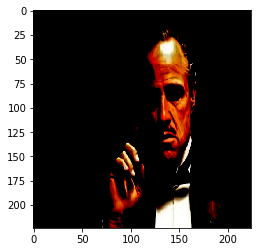

In [512]:
plt.imshow(X_train[10])

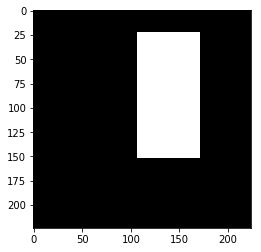

In [513]:
pyplot.imshow(masks[n], cmap='gray')

## Create the model (10 marks)
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [514]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape, Dropout
from tensorflow.keras.models import Model


def create_model(trainable=True):
    #### Add your code here ####
   
    
    model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=1.0, weights='imagenet')
    
   
    
    for layer in model.layers:
        layer.trainable = trainable

    # Add all the UNET layers here
    #### Add your code here ####
    
    # After peeling the top, the exposed(last) layer from mobileNet is conv_pw_13_relu (ReLU) (None, 7, 7, 1024)
    # we need to upsample from this layer till our mask output that is 224 x 224 x 1
    
    #  conv_pw_13_relu (None, 7, 7, 1024) - Start Layer for UNet
    block_pw_13 = model.get_layer("conv_pw_13_relu").output  
    # CONV conv_pw_13_relu (7, 7, 1024) & (3 x 3 ) @ 512 FILTERS --> X(7, 7, 512)
    x = Conv2D(512, kernel_size=3, padding='same', activation='relu')(block_pw_13) 
    
    # conv_pw_11_relu (14, 14, 512)
    block_pw_11 = model.get_layer("conv_pw_11_relu").output
    # UPSAMPLE X(7, 7, 512) --> (14, 14, 512)
    # CONCAT X(14, 14, 512) & conv_pw_11_relu (14, 14, 512) --> X(14, 14, 1024)
    x = Concatenate()([UpSampling2D()(x), block_pw_11])
    # CONV X(14, 14, 1024) & (3 x 3 ) @ 512 FILTERS --> X(14, 14, 512) 
    x = Conv2D(512, kernel_size=3, padding='same', activation='relu')(x)
    
    x = Dropout(0.5)(x)
    
    # conv_pw_5_relu (28, 28, 256)
    block_pw_5 = model.get_layer("conv_pw_5_relu").output
    # UPSAMPLE X(14, 14, 512) --> X(28, 28, 512)
    # CONCAT X(28, 28, 512) & conv_pw_5_relu (28, 28, 256) --> X(28, 28, 768)
    x = Concatenate()([UpSampling2D()(x), block_pw_5])
    # CONV X(28, 28, 768) & (3 x 3 ) @ 512 FILTERS --> X(28, 28, 512)
    x = Conv2D(512, kernel_size=3, padding='same', activation='relu')(x)
    
    x = Dropout(0.5)(x)
    
    # conv_pw_3_relu (56, 56, 128)
    block_pw_3 = model.get_layer("conv_pw_3_relu").output
    # UPSAMPLE X(28, 28, 512) --> X(56, 56, 512)
    # CONCAT  X(56, 56, 512) & conv_pw_3_relu (56, 56, 128) --> X(56, 56, 640)
    x = Concatenate()([UpSampling2D()(x), block_pw_3])
    # CONV X(56, 56, 640) & (3 x 3 ) @ 512 FILTERS --> X(56, 56, 512)
    x = Conv2D(512, kernel_size=3, padding='same', activation='relu')(x)

    x = Dropout(0.5)(x)
    
    # conv_pw_1_relu (112, 112, 64)
    block_pw_1 = model.get_layer("conv_pw_1_relu").output
    # UPSAMPLE X(56, 56, 512) --> X(112, 112, 512)
    # CONCAT X(112, 112, 512) & conv_pw_1_relu (112, 112, 64) --> X(112, 112, 576)
    x = Concatenate()([UpSampling2D()(x), block_pw_1])
    # CONV X(112, 112, 576) & (3 x 3 ) @ 512 FILTERS --> X(112, 112, 512)
    x = Conv2D(512, kernel_size=3, padding='same', activation='relu')(x)
    
    x = Dropout(0.5)(x)
    
    # INPUT LAYER (224, 224, 3)
    block_input_1 = model.input
    # UPSAMPLE X(112, 112, 512) --> X(224, 224, 512)
    # CONCAT X(224, 224, 512) & INPUT LAYER (224, 224, 3) --> X(224, 224, 515)
    x = Concatenate()([UpSampling2D()(x), block_input_1])
    # CONV X(224, 224, 515) & (3 x 3 ) @ 1024 FILTERS --> X(224, 224, 1024)
    x = Conv2D(1024, kernel_size=3, padding='same', activation='relu')(x)
    
    x = Dropout(0.5)(x)
    
    # Do (1x1) CONVOLUTION on X(224, 224, 1024) --> X(224, 224, 1)
    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)
    x = Reshape((IMAGE_HEIGHT, IMAGE_WIDTH, 1))(x)
    
    return Model(inputs=model.input, outputs=x)

### Call the create_model function

In [515]:
# Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)
model = create_model(False)

# Print summary
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_9[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
____________________________________________________________________________________________

### Define dice coefficient function (5 marks)
- Create a function to calculate dice coefficient


In [516]:
def dice_coefficient(y_true, y_pred):
    #### Add your code here ####
    
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)
    
    return numerator / (denominator + tf.keras.backend.epsilon())

### Define loss

In [517]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon

def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

### Compile the model (5 marks)
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [518]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss=loss, optimizer=optimizer, metrics=[dice_coefficient])

### Define checkpoint and earlystopping

In [519]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", period=1)
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

### Fit the model (5 marks)
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: checkpoint, reduce_lr, stop

In [520]:
# Split train and valid
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, masks, test_size=0.03, random_state=1)

In [521]:
X_train.shape

(396, 224, 224, 3)

In [522]:
y_train.shape

(396, 224, 224)

In [523]:
X_valid.shape

(13, 224, 224, 3)

In [524]:
y_valid.shape

(13, 224, 224)

In [525]:
#### Add your code here ####
EPOCHS = 10
BATCH_SIZE = 1

In [526]:
model.fit(
    x=X_train,
    y=y_train,
    batch_size=BATCH_SIZE,    
    epochs=EPOCHS,
    callbacks=[checkpoint, reduce_lr, stop],
    validation_data=(X_valid, y_valid)
)

Train on 396 samples, validate on 13 samples
Epoch 1/10
395/396 [============================>.] - ETA: 1:24 - loss: 1.2078 - dice_coefficient: 0.4788
Epoch 00001: loss improved from inf to 1.20677, saving model to model-1.21.h5
396/396 [==============================] - 33260s 84s/sample - loss: 1.2068 - dice_coefficient: 0.4790 - val_loss: 2.0634 - val_dice_coefficient: 0.5285
Epoch 2/10
395/396 [============================>.] - ETA: 7s - loss: 0.8889 - dice_coefficient: 0.5737 
Epoch 00002: loss improved from 1.20677 to 0.88738, saving model to model-0.89.h5
396/396 [==============================] - 2943s 7s/sample - loss: 0.8874 - dice_coefficient: 0.5744 - val_loss: 2.0066 - val_dice_coefficient: 0.5225
Epoch 3/10
395/396 [============================>.] - ETA: 7s - loss: 0.7329 - dice_coefficient: 0.6345 
Epoch 00003: loss improved from 0.88738 to 0.73534, saving model to model-0.74.h5
396/396 [==============================] - 2896s 7s/sample - loss: 0.7353 - dice_coefficient:

### Get the predicted mask for a sample image   (5 marks)
### Impose the mask on the image (5 marks)

In [527]:
pred_masks = model.predict(X_valid[0:5], verbose=1) 

5/1 [======================================================================================================================================================] - 9s 2s/sample


In [528]:
pred_masks.shape

(5, 224, 224, 1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

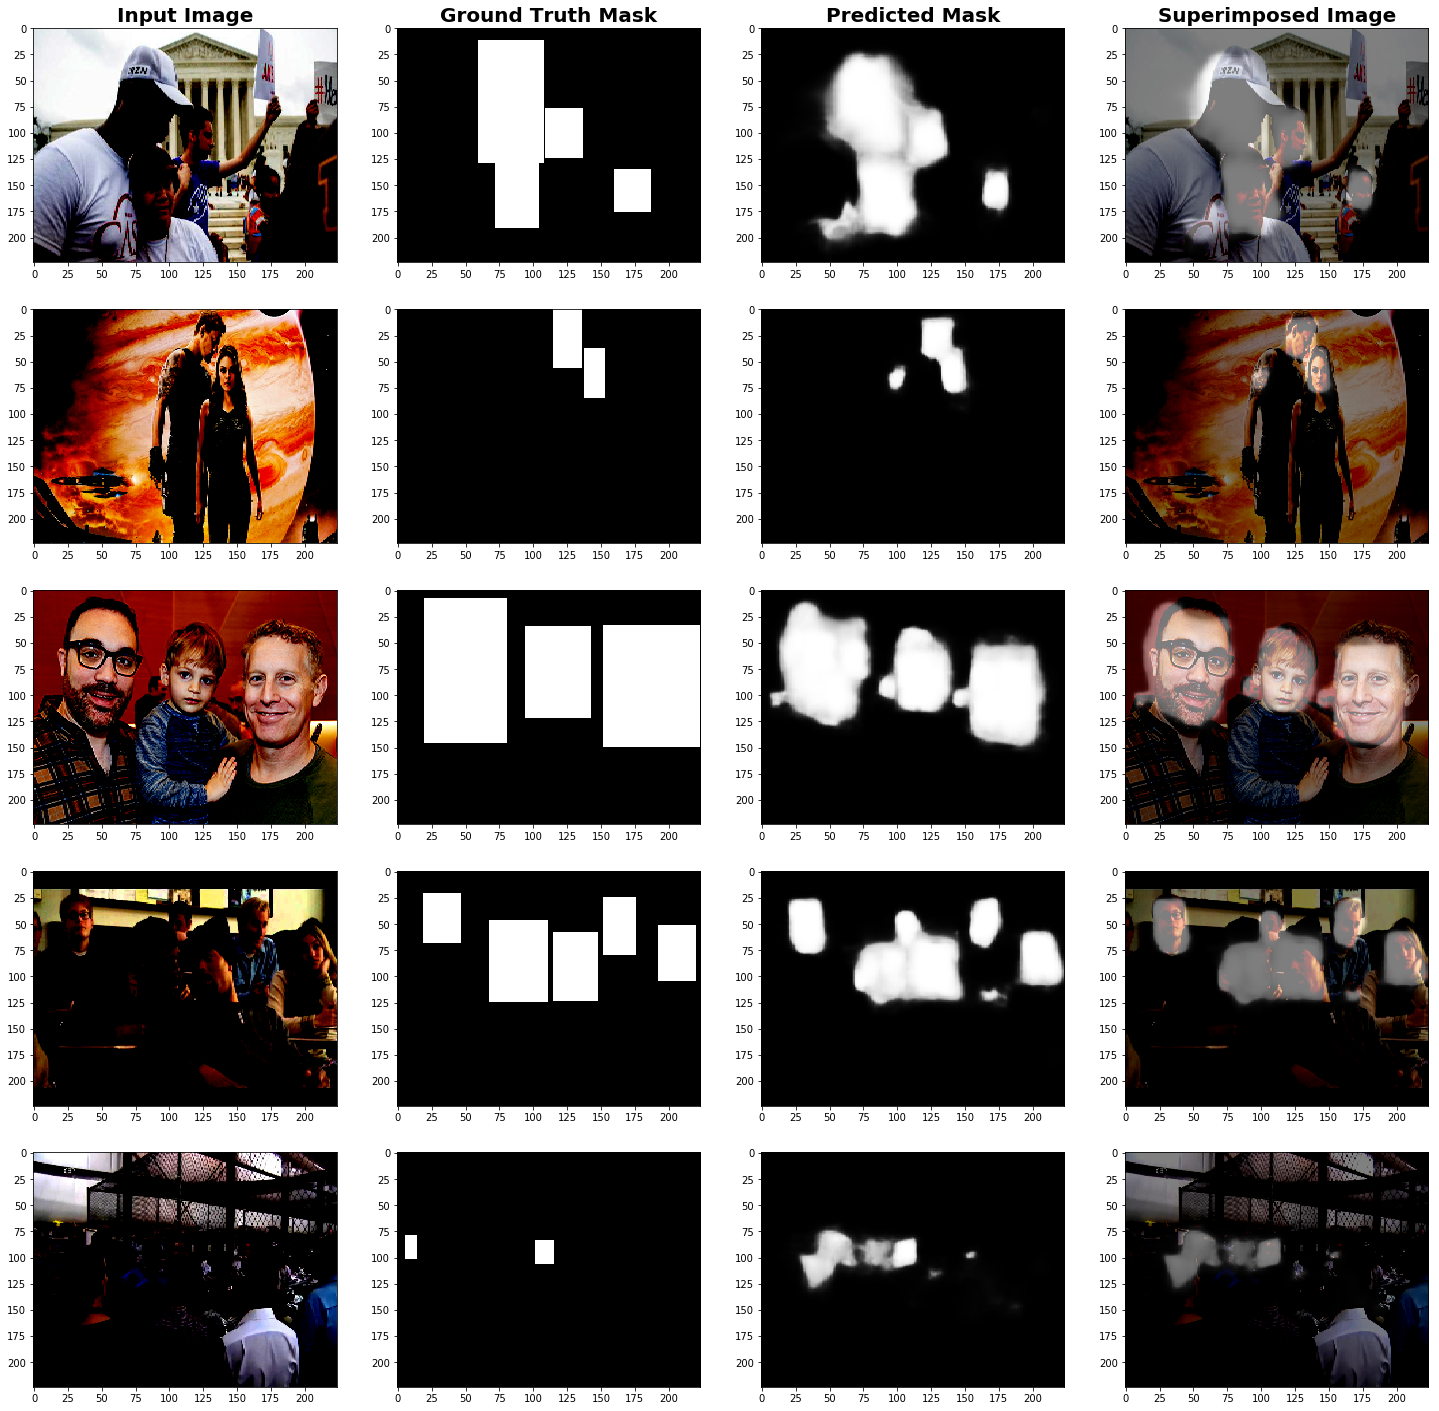

In [529]:
fig, a = pyplot.subplots(5, 4, figsize=[25, 25])

a[0][0].set_title('Input Image', fontweight="bold", size=20)
a[0][1].set_title('Ground Truth Mask', fontweight="bold", size=20)
a[0][2].set_title('Predicted Mask', fontweight="bold", size=20)
a[0][3].set_title('Superimposed Image', fontweight="bold", size=20)

for i in range(pred_masks.shape[0]):
    a[i][0].imshow(X_valid[i], aspect='auto')
    
    a[i][1].imshow(y_valid[i], cmap='gray', aspect='auto')
     
    predicted_mask = np.reshape(pred_masks[i], (IMAGE_HEIGHT, IMAGE_WIDTH))
    a[i][2].imshow(predicted_mask, cmap = 'gray', aspect='auto') 
    
    a[i][3].imshow(X_valid[i], aspect='auto')
    a[i][3].imshow(predicted_mask, alpha=0.5, cmap='gray', aspect='auto')
        
    
#plt.tight_layout(True)
plt.show()


In [449]:
# Superimposed image

### Method 1 : Superimposing Mask on the Image

Done above 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


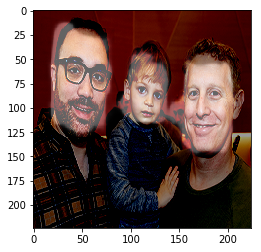

In [450]:
predicted_mask = np.reshape(pred_masks[2], (IMAGE_HEIGHT, IMAGE_WIDTH))

plt.imshow(X_valid[2]) 
plt.imshow(predicted_mask, alpha=0.4, cmap='gray')

### Method 2 : Superimposing Mask on the Image

In [451]:
result = pred_masks[2] * X_valid[2]  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


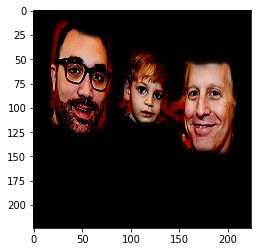

In [452]:
plt.imshow(result)

### Pretrained models mobileNet and UNet were used to build our model to detect face. These models were fine tuned. For designing our network, the dense layer, FC last layer of mobileNet n/w was peeled out(include_top=False), pretrained imagenet weights were used. 1024 Feature maps of 7 x 7 out of mobileNet were used as input to attain(UpSample) 224 x 224 x 1 mask by adding UNet architecture.

### Note : Accuracy(Area of intersection) can be increased if we increase number of epochs, number of examples in training and also add Drop out layers. Dropout layers will regularize the network and give better results.